Assumption 1: Data type of 'Mischief': int64
Assumption 2: Unique values in 'Cloak': [0 1]

Assumption 3:
Participants in 'with cloak' group: 12
Participants in 'without cloak' group: 12

Assumption 4:


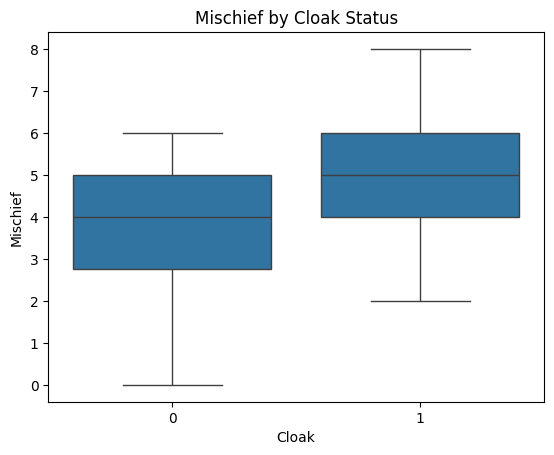

Assumption 5:
Shapiro-Wilk test for 'with cloak' group: p-value = 0.93619
Shapiro-Wilk test for 'without cloak' group: p-value = 0.23145


Assumption 6:
Levene’s test for equality of variances: p-value = 0.60868
Equal variances.

Independent t-test: t-statistic = 1.71346, p-value = 0.10069
There is no significant difference in 'Mischief' between the two groups.


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('Invisibility Cloak.csv')

cloak_group = df[df['Cloak'] == 1]['Mischief']  
no_cloak_group = df[df['Cloak'] == 0]['Mischief'] 

print(f"Assumption 1: Data type of 'Mischief': {df['Mischief'].dtype}")

print(f"Assumption 2: Unique values in 'Cloak': {df['Cloak'].unique()}")

cloak_group_count = df['Cloak'].value_counts()
print("\nAssumption 3:")
print(f"Participants in 'with cloak' group: {cloak_group_count.get(1, 0)}")
print(f"Participants in 'without cloak' group: {cloak_group_count.get(0, 0)}")


print("\nAssumption 4:")
sns.boxplot(x='Cloak', y='Mischief', data=df)
plt.title('Mischief by Cloak Status')
plt.show()
 

shapiro_with_cloak = stats.shapiro(cloak_group)
shapiro_without_cloak = stats.shapiro(no_cloak_group)

print("Assumption 5:")
print(f"Shapiro-Wilk test for 'with cloak' group: p-value = {shapiro_with_cloak[1]:.5f}")
print(f"Shapiro-Wilk test for 'without cloak' group: p-value = {shapiro_without_cloak[1]:.5f}")

levene_stat, levene_p_val = stats.levene(cloak_group, no_cloak_group)

print("\n\nAssumption 6:")
print(f"Levene’s test for equality of variances: p-value = {levene_p_val:.5f}")
if levene_p_val > 0.05:
    print("Equal variances.\n")
else:
    print("Unequal variances.\n")

t_stat, p_val = stats.ttest_ind(cloak_group, no_cloak_group, equal_var=True)


print(f"Independent t-test: t-statistic = {t_stat:.5f}, p-value = {p_val:.5f}")
if p_val < 0.05:
    print("There is a significant difference in 'Mischief' between the 'with cloak' and 'without cloak' groups.")
else:
    print("There is no significant difference in 'Mischief' between the two groups.")
